# Daily Update of COVID-19 in Central Sulawesi

Data is taken from [banuacoders.com](banuacododers.com/api/pico). This website collect a static data from local government website and publish it as a JSON file.

The data then processed here and uploaded to Instagram @[sultenglawancovid](https://www.instagram.com/sultenglawancovid/) (Central Sulawesi Versus COVID).

In [1]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)

#plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid
import matplotlib.dates as mdates

#math operation
import numpy as np

#import file from internet
import json
import urllib.request

#Library to plot choropleth
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

#make images
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

## COVID-19 Spread in Central Sulawesi

Shows COVID-19 spread in Central Sulawesi as a choropleth by, using `geopandas` and `geoplot` libraries

### Get data from website

In [2]:
url_kab_kota = "https://banuacoders.com/api/pico/kabupaten"
data_kab_kota = urllib.request.urlopen(url_kab_kota).read().decode()
dict_kab_kota = json.loads(data_kab_kota)

polygon_raw_json = open('../JSON/smooth01.json');
dict_map = json.load(polygon_raw_json);

before_palu = 5;
after_palu = 6;
finished = 13;

list_ODP = [];
list_PDP = [];
list_positif = [];
list_sembuh = [];
list_meninggal = [];
list_negatif = [];
list_dirawat = [];

index = 0

print("Kabupaten/Kota" + "| ODP | PDP | Positif | Sembuh | Meninggal")
for i in range(before_palu):
    index+=1
    kabupaten = dict_kab_kota['data'][i]['kabupaten']
    ODP = dict_kab_kota['data'][i]['dalam_pemantauan']
    PDP = dict_kab_kota['data'][i]['dalam_pengawasan']
    positif = dict_kab_kota['data'][i]['positif']
    negatif = dict_kab_kota['data'][i]['negatif']
    sembuh = dict_kab_kota['data'][i]['sembuh']
    meninggal = dict_kab_kota['data'][i]['meninggal']
    
    dict_map['features'][i]['properties']['ODP'] = ODP
    dict_map['features'][i]['properties']['PDP'] = PDP
    dict_map['features'][i]['properties']['positif'] = positif
    dict_map['features'][i]['properties']['negatif'] = negatif
    dict_map['features'][i]['properties']['sembuh'] = sembuh
    dict_map['features'][i]['properties']['meninggal'] = meninggal
    dict_map['features'][i]['properties']['dirawat'] = positif-sembuh-meninggal
    
    print(str(index) + ". " + kabupaten + " | " + str(ODP) + " | " + str(PDP) + " | " + str(positif))
    
    list_ODP.append(ODP)
    list_PDP.append(PDP)
    list_positif.append(positif)
    list_negatif.append(negatif)
    list_sembuh.append(sembuh)
    list_meninggal.append(meninggal)
    list_dirawat.append(positif-sembuh-meninggal)
    
    
    
print("next")
for i in range(after_palu, finished, 1):
    index+=1
    kabupaten = dict_kab_kota['data'][i-1]['kabupaten']
    ODP = dict_kab_kota['data'][i-1]['dalam_pemantauan']
    PDP = dict_kab_kota['data'][i-1]['dalam_pengawasan']
    positif = dict_kab_kota['data'][i-1]['positif']
    negatif = dict_kab_kota['data'][i-1]['negatif']
    sembuh = dict_kab_kota['data'][i-1]['sembuh']
    meninggal = dict_kab_kota['data'][i-1]['meninggal']
    
    dict_map['features'][i]['properties']['ODP'] = ODP
    dict_map['features'][i]['properties']['PDP'] = PDP
    dict_map['features'][i]['properties']['positif'] = positif
    dict_map['features'][i]['properties']['negatif'] = negatif
    dict_map['features'][i]['properties']['sembuh'] = sembuh
    dict_map['features'][i]['properties']['meninggal'] = meninggal
    dict_map['features'][i]['properties']['dirawat'] = positif-sembuh-meninggal
    
    print(str(index) + ". " + kabupaten + " | " + str(ODP) + " | " + str(PDP) + " | " + str(positif))
    
    list_ODP.append(ODP)
    list_PDP.append(PDP)
    list_positif.append(positif)
    list_negatif.append(negatif)
    list_sembuh.append(sembuh)
    list_meninggal.append(meninggal)
    list_dirawat.append(positif-sembuh-meninggal)

kabupaten = dict_kab_kota['data'][12]['kabupaten']
ODP = dict_kab_kota['data'][12]['dalam_pemantauan']
PDP = dict_kab_kota['data'][12]['dalam_pengawasan']
positif = dict_kab_kota['data'][12]['positif']
negatif = dict_kab_kota['data'][12]['negatif']
sembuh = dict_kab_kota['data'][12]['sembuh']
meninggal = dict_kab_kota['data'][12]['meninggal']

index+=1
print(str(index) + ". " + kabupaten + " | " + str(ODP) + " | " + str(PDP) + " | " + str(positif))

dict_map['features'][5]['properties']['ODP'] = ODP
dict_map['features'][5]['properties']['PDP'] = PDP
dict_map['features'][5]['properties']['positif'] = positif
dict_map['features'][5]['properties']['negatif'] = negatif
dict_map['features'][5]['properties']['sembuh'] = sembuh
dict_map['features'][5]['properties']['meninggal'] = meninggal
dict_map['features'][5]['properties']['dirawat'] = positif-sembuh-meninggal
    
list_ODP.append(ODP)
list_PDP.append(PDP)
list_positif.append(positif)
list_negatif.append(negatif)
list_sembuh.append(sembuh)
list_meninggal.append(meninggal)
list_dirawat.append(positif-sembuh-meninggal)

with open('../JSON/covid19sulteng.json', 'w') as outfile:
    json.dump(dict_map, outfile)

Kabupaten/Kota| ODP | PDP | Positif | Sembuh | Meninggal
1. Banggai | 0 | 0 | 9
2. Banggai Kepulauan | 0 | 0 | 1
3. Banggai Laut | 0 | 0 | 1
4. Buol | 28 | 0 | 56
5. Donggala | 16 | 1 | 1
next
6. Morowali | 4 | 2 | 11
7. Morowali Utara | 1 | 6 | 14
8. Parigi Mautong | 5 | 0 | 1
9. Poso | 14 | 7 | 12
10. Sigi | 0 | 0 | 3
11. Tojo Una-Una | 2 | 0 | 0
12. Toli-Toli | 196 | 7 | 15
13. Kota Palu | 17 | 6 | 35


In [3]:
print(sum(list_ODP))
print(sum(list_PDP))
print(sum(list_positif))
print(sum(list_negatif))
print(sum(list_sembuh))
print(sum(list_meninggal))
print(sum(list_dirawat))

283
29
159
153
95
4
60


### Create Chropleth

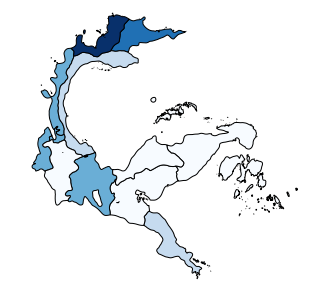

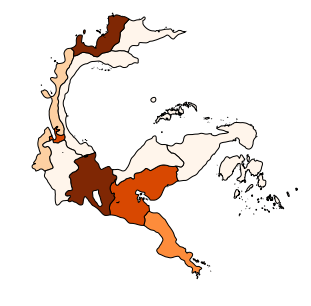

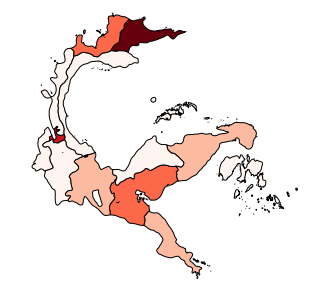

In [4]:
data = gpd.read_file('../JSON/covid19sulteng.json')
polygon_sulteng = gpd.read_file('../JSON/covid19sulteng.json')

gplt.choropleth(
    polygon_sulteng, hue='ODP', 
    edgecolor='black', linewidth=1,
    cmap='Blues', legend=False,
    scheme='FisherJenks',
    figsize=(5, 5))

gplt.choropleth(
    polygon_sulteng, hue='PDP', 
    edgecolor='black', linewidth=1,
    cmap='Oranges', legend=False,
    scheme='FisherJenks',
    figsize=(5, 5))

gplt.choropleth(
    polygon_sulteng, hue='positif', 
    edgecolor='black', linewidth=1,
    cmap='Reds', legend=False,
    scheme='FisherJenks',
    figsize=(5, 5))

Kasus Baru ODP: 28
Selesai Masa ODP: 8
Kasus Baru PDP: 10
Tanggal: 12 Juni 2020


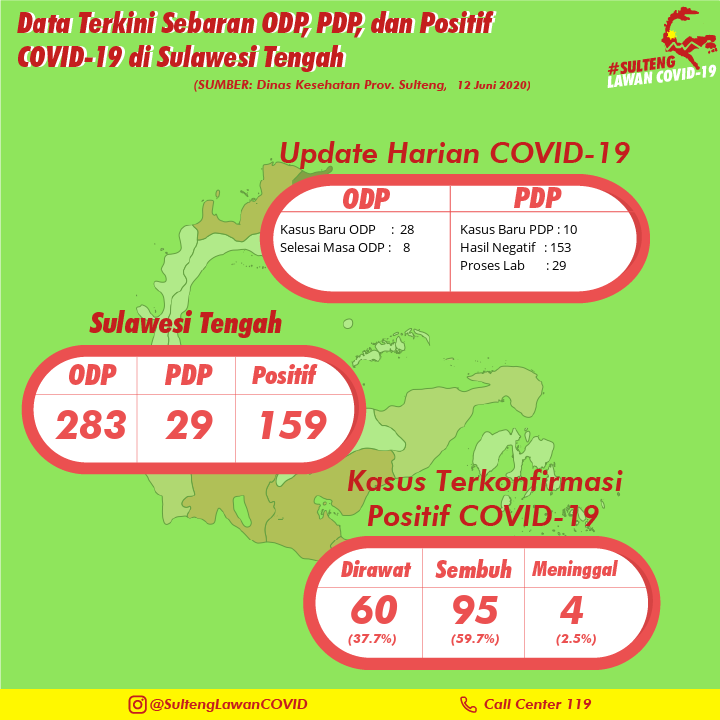

In [5]:
img = Image.open('../Images/Slide1Background.png')

draw = ImageDraw.Draw(img)

font0 = ImageFont.truetype("../Font/tt0145m_.ttf", 11)
font1 = ImageFont.truetype("../Font/OpenSans-Regular.ttf", 13)
font2 = ImageFont.truetype("../Font/tt0145m_.ttf", 40)
font3 = ImageFont.truetype("../Font/tt0145m_.ttf", 13)

kasus_baru_ODP = input("Kasus Baru ODP: ")
selesai_masa_ODP = input("Selesai Masa ODP: ")
kasus_baru_PDP = input("Kasus Baru PDP: ")
tanggal = input("Tanggal: ")
#kasus_baru_ODP = 28
#selesai_masa_ODP = 8
#kasus_baru_PDP = 2

text1_1 = "Kasus Baru ODP     :  " + str(kasus_baru_ODP)
text1_2 = "Selesai Masa ODP :    " + str(selesai_masa_ODP)
text1 = text1_1 + "\n" + text1_2
draw.text((280, 220),text1,(0,0,0),font=font1)

text2_1 = "Kasus Baru PDP : " + str(kasus_baru_PDP)
text2_2 = "Hasil Negatif   : " + str(sum(list_negatif))
text2_3 = "Proses Lab       : " + str(sum(list_PDP))
text2 = text2_1 + "\n" + text2_2 + "\n" + text2_3
draw.text((460, 220),text2,(0,0,0),font=font1)

text3 = str(sum(list_ODP))
draw.text((55, 400),text3,(235, 80, 80),font=font2)

text4 = str(sum(list_PDP))
draw.text((165, 400),text4,(235, 80, 80),font=font2)

text5 = str(sum(list_positif))
draw.text((255, 400),text5,(235, 80, 80),font=font2)

y_offset_3 = 585
y_offset_4 = 630

text6 = str(sum(list_dirawat))
text6_percentage = str("({:.1f}".format(sum(list_dirawat)/sum(list_positif)*100) + "%)")
draw.text((350, y_offset_3),text6,(235, 80, 80),font=font2)
draw.text((347, y_offset_4),text6_percentage,(235, 80, 80),font=font3)

text7 = str(sum(list_sembuh))
text7_percentage = str("({:.1f}".format(sum(list_sembuh)/sum(list_positif)*100) + "%)")
draw.text((450, y_offset_3),text7,(235, 80, 80),font=font2)
draw.text((450, y_offset_4),text7_percentage,(235, 80, 80),font=font3)

text8 = str(sum(list_meninggal))
text8_percentage = str("({:.1f}".format(sum(list_meninggal)/sum(list_positif)*100) + "%)")
draw.text((560, y_offset_3),text8,(235, 80, 80),font=font2)
draw.text((555, y_offset_4),text8_percentage,(235, 80, 80),font=font3)

#img = Image.new('RGB', (100, 30), color = (143, 229, 92))
calendar = Image.new('RGB', (100, 30), color = (143, 229, 92))
draw_calendar = ImageDraw.Draw(calendar)
draw_calendar.text((10,10), (tanggal + ")"), (196, 30, 30), font=font0)

back_im = img.copy()
back_im.paste(calendar, (446,68))

back_im.save('../Images/Result_Slide1.png')
display(back_im)

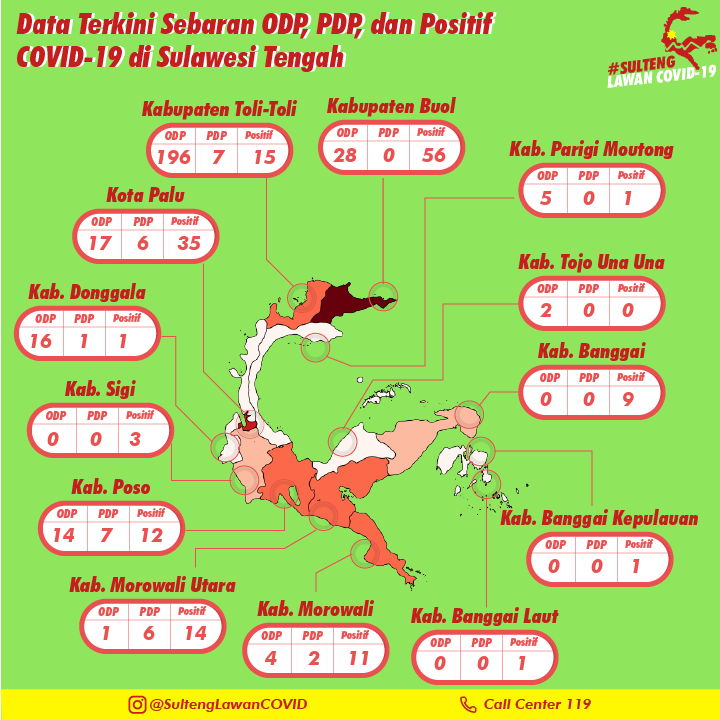

In [6]:
img = Image.open('../Images/Slide2Background.png')

font5 = ImageFont.truetype("../Font/tt0145m_.ttf", 20)
font6 = ImageFont.truetype("../Font/tt0145m_.ttf", 10)

draw = ImageDraw.Draw(img)

#for offset in range(0, 700, 50):
#    draw.text((offset, 0), str(offset),(0,0,0),font=font6)
#    draw.text((0, offset), str(offset),(0,0,0),font=font6)
        
offset_list = [(540, 386), (548, 553), (434, 650), (333, 142), (28, 328),
               (87, 230), (265, 645), (100, 620), (540, 185), (50, 522),
               (47, 426), (540, 297), (155, 144)]

for index in range(13):
    #print(str(index) + ". " + dict_map['features'][index]['properties']['KAB_KOT'])
    x_offset = offset_list[index][0]
    y_offset = offset_list[index][1]
    ODP = str(dict_map['features'][index]['properties']['ODP'])
    PDP = str(dict_map['features'][index]['properties']['PDP'])
    positif = str(dict_map['features'][index]['properties']['positif'])
    draw.text((x_offset, y_offset), ODP,(235, 80, 80),font=font5)
    
    draw.text((x_offset+43 + (len(ODP)-1)*7, y_offset), PDP,(235, 80, 80),font=font5)
    draw.text((x_offset+82 + (len(ODP)-1)*7, y_offset), positif,(235, 80, 80),font=font5)

img.save('../Images/Result_Slide2.png')
display(img)

0. BANGGAI
1. BANGGAI KEPULAUAN
2. BANGGAI LAUT
3. BUOL
4. DONGGALA
5. KOTA PALU
6. MOROWALI
7. MOROWALI UTARA
8. PARIGI MOUTONG
9. POSO
10. SIGI
11. TOJO UNA-UNA
12. TOLI - TOLI


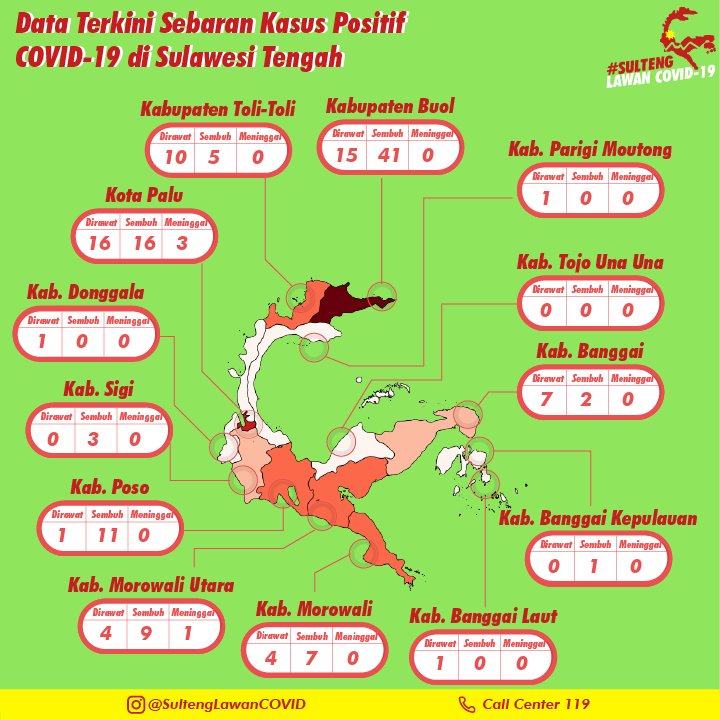

In [20]:
img = Image.open('../Images/Slide4Background.png')

font5 = ImageFont.truetype("../Font/tt0145m_.ttf", 20)
font6 = ImageFont.truetype("../Font/tt0145m_.ttf", 10)

draw = ImageDraw.Draw(img)

#for offset in range(0, 700, 50):
#    draw.text((offset, 0), str(offset),(0,0,0),font=font6)
#    draw.text((0, offset), str(offset),(0,0,0),font=font6)
        
offset_list = [(540, 386), (548, 553), (434, 650), (333, 142), (36, 328),
               (87, 230), (265, 645), (100, 620), (540, 185), (56, 522),
               (47, 426), (540, 297), (163, 144)]

for index in range(13):
    print(str(index) + ". " + dict_map['features'][index]['properties']['KAB_KOT'])
    x_offset = offset_list[index][0]
    y_offset = offset_list[index][1]
    dirawat = str(dict_map['features'][index]['properties']['dirawat'])
    sembuh = str(dict_map['features'][index]['properties']['sembuh'])
    meninggal = str(dict_map['features'][index]['properties']['meninggal'])
    draw.text((x_offset, y_offset), dirawat,(235, 80, 80),font=font5)
    
    draw.text((x_offset+40 + (len(dirawat)-1)*5, y_offset), sembuh,(235, 80, 80),font=font5)
    draw.text((x_offset+82 + (len(dirawat)-1)*7, y_offset), meninggal,(235, 80, 80),font=font5)

img.save('../Images/Result_Slide4.png')
display(img)

## COVID-19 Trend in Central Sulawesi

Display COVID-19 trend in Central Sulawesi using `Panda` and `PIL` library

### Get data from website

In [21]:
url_statistik = "https://banuacoders.com/api/pico/statistik"
json_statistik = urllib.request.urlopen(url_statistik).read().decode()
dict_statistik = json.loads(json_statistik)

nbOfDays = len(dict_statistik['data'])
statistik_data = dict_statistik['data'];

total_positive = []
total_recovered = []
total_death = []
total_rawat = []
daily_positive = []
date = []

#print(statistik_data)
for i in range(nbOfDays):
    total_positive.append(statistik_data[i]['cumulative_positive'])
    total_recovered.append(statistik_data[i]['cumulative_recovered'])
    total_death.append(statistik_data[i]['cumulative_death'])
    total_rawat.append(statistik_data[i]['cumulative_positive']-statistik_data[i]['cumulative_death']-statistik_data[i]['cumulative_recovered'])
    
    daily_positive.append(statistik_data[i]['positive'])
    if(i==52):
        date_with_year = "13 May 2020"
    else:
        date_with_year = statistik_data[i]['date']
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + " " + date_splitted[1])



### Add data in case off the website is not updated

In [22]:
def add_extra(positive, recovered, death, daily_positive_input, date_with_year):
    positive_add = positive
    recovered_add = recovered
    death_add = death
    total_positive.append(positive_add)
    total_recovered.append(recovered_add)
    total_death.append(death_add)
    total_rawat.append(positive_add-recovered_add-death_add)

    daily_positive.append(daily_positive_input)
    date_with_year = date_with_year
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + date_splitted[1])
    
#add_extra(159, 95, 4, 0, "11 Juni 2020")

### Plot data

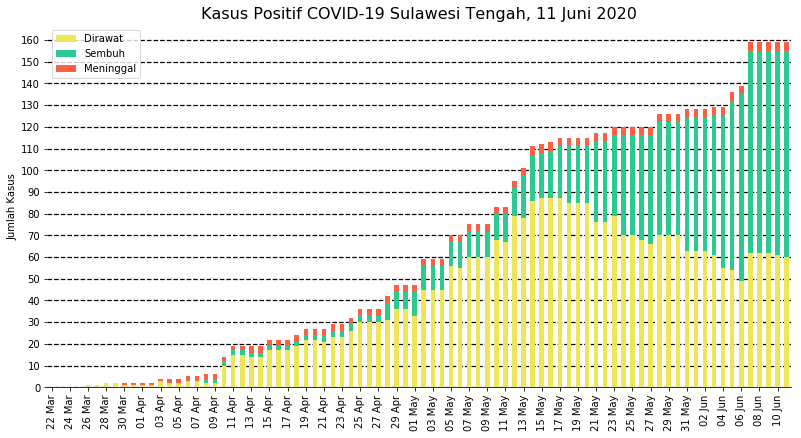

In [23]:
plotdata = pd.DataFrame({
    "Dirawat":total_rawat,
    "Sembuh":total_recovered,
    "Meninggal":total_death
    }, 
    index=np.arange(len(total_rawat))
)

nbOfDays = len(total_rawat)
index=np.arange(nbOfDays)
colors = ['#eee657','#2cc990','#fc6042']
ax = plotdata.plot(kind='bar', stacked=True, color = colors)

new_date = []
for i in range(0, nbOfDays, 2):
    new_date.append(date[i])
    
plt.title('Kasus Positif COVID-19 Sulawesi Tengah, ' + date_splitted[0] + " Juni " + date_splitted[2], fontsize=16, y = 1)
plt.xticks(range(0, len(index), 2), new_date, rotation=90)
plt.yticks(range(0, 170, 10), range(0, 170, 10))
plt.ylabel('Jumlah Kasus')

#ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#xint = range(0, nbOfDays, 2)
#matplotlib.pyplot.xticks(xint)

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
ax.set_axisbelow(True)
matplotlib.pyplot.grid(b=None, which='major', axis='y', color='k', linestyle='--', linewidth=1.25)
plt.savefig('../Images/KasusPositif.png', dpi=300, transparent=True)

### Save image for Instagram post

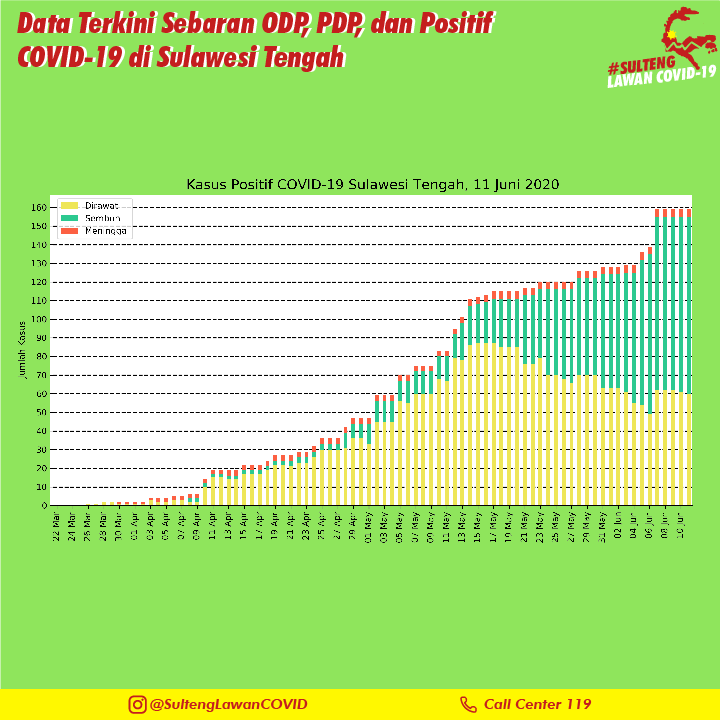

In [24]:
im1 = Image.open('../Images/Slide3Background.png')
im2 = Image.open('../Images/KasusPositif.png')
white_background = Image.open("../Images/WhiteBackground.png")


im2_w_goal = 825
divider = im2.width/im2_w_goal
im2_x_off = -50
im2_y_off = 145
im2_w = int(im2.width / divider)
im2_h = int(im2.height / divider)
im_resized = im2.resize((im2_w, im2_h))

white_background_x_off = 50
white_background_y_off = 195
white_background_w = 642
white_background_h = 310
white_background = white_background.resize((white_background_w, white_background_h))

back_im = im1.copy()
back_im.paste(white_background, (white_background_x_off, white_background_y_off))
back_im.paste(im_resized, (im2_x_off, im2_y_off), mask=im_resized)
back_im.save('../Images/Result_Slide3.png', quality=100)
display(back_im)

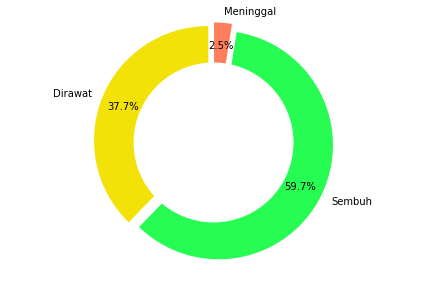

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Dirawat', 'Sembuh', 'Meninggal'
sizes = [total_rawat[-1], total_recovered[-1], total_death[-1]]
explode = (0.05, 0.05 ,0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = ['#f2e207','#26fc51','#ff7f5c']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
from PIL import Image, ImageDraw

img = Image.new('RGB', (100, 30), color = (0, 0, 0))

d = ImageDraw.Draw(img)
d.text((10,10), "Hello World", fill=(255,255,0))

display(img)